## The most Nobel of Prizes
<p>Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.</p>

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
nobel = pd.read_csv("dataset/nobel.csv")
nobel.head(n = 4)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland


## 2. So, who gets the Nobel Prize?
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

In [2]:
# Display the number of (possibly shared) Nobel Prizes handed.
display(len(nobel))

# Display the number of prizes won by male and female recipients.
display(nobel['sex'].value_counts())

# Display the number of prizes won by the top 10 nationalities.
nobel['birth_country'].value_counts().head(10)

911

Male      836
Female     49
Name: sex, dtype: int64

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64

## 3. USA dominance
<p>the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?</p>

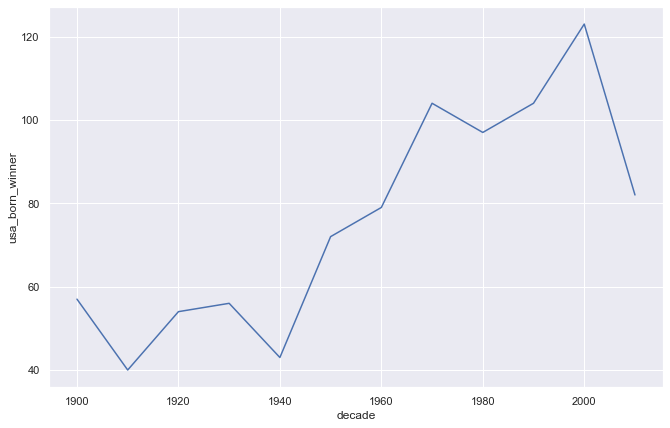

In [5]:
import matplotlib as plt
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year']/10)*10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].count()
#print(prop_usa_winners)
prop_usa_winners

# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(x = 'decade', y = 'usa_born_winner', data = prop_usa_winners)


## 5. What is the gender of a typical Nobel Prize winner?
<p>Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</p>

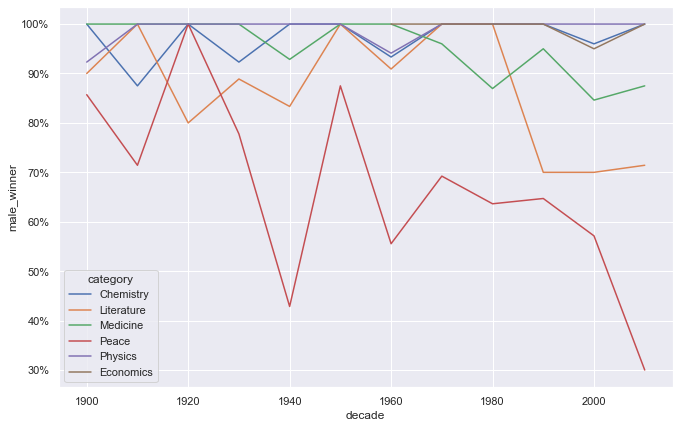

In [29]:
from matplotlib.ticker import PercentFormatter
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex']=='Female'
nobel['male_winner'] = nobel['sex']=='Male'
prop_female_winners = nobel.groupby(['decade','category'],as_index=False)['female_winner'].mean()
prop_male_winners = nobel.groupby(['decade','category'],as_index=False)['male_winner'].mean()
#prop_female_winners
prop_female_winners
# Plotting USA born winners with % winners on the y-axis
ax = sns.lineplot(x = 'decade', y = 'male_winner', hue='category',data = prop_male_winners)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

## 6. The firsts and lasts winners

In [9]:
nobel[nobel.sex == 'Male'].nlargest(3, 'year')
nobel[nobel.sex == 'Female'].nlargest(3, 'year')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
893,2015,Literature,The Nobel Prize in Literature 2015,"""for her polyphonic writings, a monument to su...",1/1,924,Individual,Svetlana Alexievich,1948-05-31,Ivano-Frankivsk,Ukraine,Female,NaN,NaN,NaN,NaN,NaN,NaN
896,2015,Medicine,The Nobel Prize in Physiology or Medicine 2015,"""for her discoveries concerning a novel therap...",1/2,918,Individual,Youyou Tu,1930-12-30,Zhejiang Ningbo,China,Female,China Academy of Traditional Chinese Medicine,Beijing,China,NaN,NaN,NaN
882,2014,Medicine,The Nobel Prize in Physiology or Medicine 2014,"""for their discoveries of cells that constitut...",1/4,904,Individual,May-Britt Moser,1963-01-04,Fosnavåg,Norway,Female,Norwegian University of Science and Technology...,Trondheim,Norway,NaN,NaN,NaN


## 7. Repeat laureates
<p>for some people, one is just not enough, and few have gotten it more than twice. Who are these lucky few?</p>

In [6]:
# Selecting the laureates that have received 2 or more prizes.

nobel.groupby('full_name').filter(lambda group: len(group) >= 3)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 8. How old are you when you get the prize?
<p>But how old are you generally when you get the prize?</p>

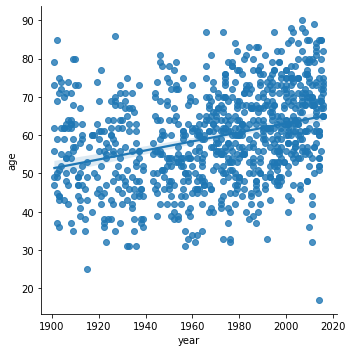

In [12]:
# Converting birth_date from String to datetime
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(x='year', y='age', data=nobel)

In [17]:
print(nobel[nobel.sex == 'Female'].nlargest(1, 'age'))
nobel.groupby(['sex'],as_index = True)['age'].mean()

     year    category                               prize  \
796  2007  Literature  The Nobel Prize in Literature 2007   

                                            motivation prize_share  \
796  "that epicist of the female experience, who wi...         1/1   

     laureate_id laureate_type      full_name birth_date  birth_city  \
796          817    Individual  Doris Lessing 1919-10-22  Kermanshah   

     birth_country     sex organization_name organization_city  \
796  Persia (Iran)  Female               NaN               NaN   

    organization_country  death_date death_city   death_country   age  
796                  NaN  2013-11-17     London  United Kingdom  88.0  


sex
Female    58.000000
Male      59.538369
Name: age, dtype: float64

## 10. Oldest and youngest winners
<p>More plots with lots of exciting stuff going on! We see that both winners of the chemistry, medicine, and physics prize have gotten older over time. </p>

In [18]:
# The oldest winner of a Nobel Prize as of 2016
display(nobel.nlargest(1, 'age'))
# The youngest winner of a Nobel Prize as of 2016
nobel.nsmallest(1, 'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,Russia,Male,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,90.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Female,NaN,NaN,NaN,NaN,NaN,NaN,17.0


## 1. Loading your friend's data into a dictionary
<p><img src="https://www.freepnglogos.com/uploads/netflix-logo-text-emblem-31.png" alt="Someone's feet on table facing a television"></p>
<p>Netflix! What started in 1997 as a DVD rental service has since exploded into the largest entertainment/media company by <a href="https://www.marketwatch.com/story/netflix-shares-close-up-8-for-yet-another-record-high-2020-07-10">market capitalization</a>, boasting over 200 million subscribers as of <a href="https://www.cbsnews.com/news/netflix-tops-200-million-subscribers-but-faces-growing-challenge-from-disney-plus/">January 2021</a>.</p>

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}
   years  durations
0   2011        103
1   2012        101
2   2013         99
3   2014        100
4   2015        100
5   2016         95
6   2017         95
7   2018         96
8   2019         93
9   2020         90


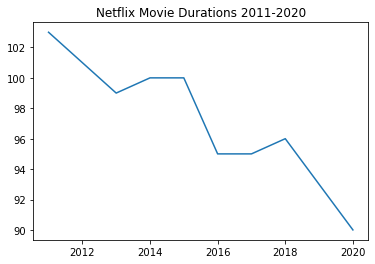

In [23]:
#Test
# Create the years and durations lists
years = [2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
durations = [103,101,99,100,100,95,95,96,93,90]
# Create a dictionary with the two lists
movie_dict = {'years':years,'durations':durations}
print (movie_dict)

import pandas as pd
import matplotlib.pyplot as plt
# Create a DataFrame from the dictionary
durations_df = pd.DataFrame(movie_dict)
print (durations_df)

fig = plt.figure()
# Draw a line plot of release_years and durations
plt.plot(years,durations)
plt.title("Netflix Movie Durations 2011-2020")
plt.show()

## 4. Loading the rest of the data from a CSV
<p>There are a few questions about this trend that we are currently unable to answer, including:</p>
<ol>
<li>What does this trend look like over a longer period of time?</li>
<li>Is this explainable by something like the genre of entertainment?</li>
</ol>

In [24]:
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv("dataset/netflix_data.csv")
print(netflix_df.head(2))

  show_id     type title           director  \
0      s1  TV Show    3%                NaN   
1      s2    Movie  7:19  Jorge Michel Grau   

                                                cast country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  Mexico   

          date_added  release_year  duration  \
0    August 14, 2020          2020         4   
1  December 23, 2016          2016        93   

                                         description             genre  
0  In a future where the elite inhabit an island ...  International TV  
1  After a devastating earthquake hits Mexico Cit...            Dramas  
